#  Movie ROI Analysis: Bollywood, Indian, and Tollywood Movies

## 1.  Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.  Load Datasets

In [2]:
# Load Bollywood, Indian, and Tollywood movie datasets
bollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_bollywood_movies.csv')
indian = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_indian_movies_simple_detailed.csv')
tollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_tollywood_movies.csv')

## 3.  Standardize Column Names

In [3]:
# Rename columns for consistency across datasets
indian.rename(columns={'Budget (Crores)': 'budget_crores', 'BoxOffice (Crores)': 'boxoffice_crores', 'ReleaseYear': 'releaseyear'}, inplace=True)
tollywood.rename(columns={'Budget (Crores)': 'budget_crores', 'BoxOffice (Crores)': 'boxoffice_crores', 'ReleaseYear': 'releaseyear'}, inplace=True)

## 4.  Combine All Datasets

In [4]:
combined = pd.concat([bollywood, indian, tollywood], ignore_index=True)

## 5  Calculate Profit and ROI

In [5]:
# Calculate Profit and ROI with error handling
combined['profit_crores'] = combined['boxoffice_crores'] - combined['budget_crores']
combined['roi'] = combined.apply(
    lambda x: x['profit_crores'] / x['budget_crores'] if x['budget_crores'] > 0 else 0, 
    axis=1
)

## 6.  Get Top Movies by ROI

In [6]:
top3_all = combined.sort_values(by='roi', ascending=False).head(3)
top3_hindi = combined[combined['language'].str.contains('Hindi', case=False, na=False)].sort_values(by='roi', ascending=False).head(3)
top3_telugu = combined[combined['language'].str.lower() == 'telugu'].sort_values(by='roi', ascending=False).head(3)

## 7.  Visualize Top 3 ROI Movies

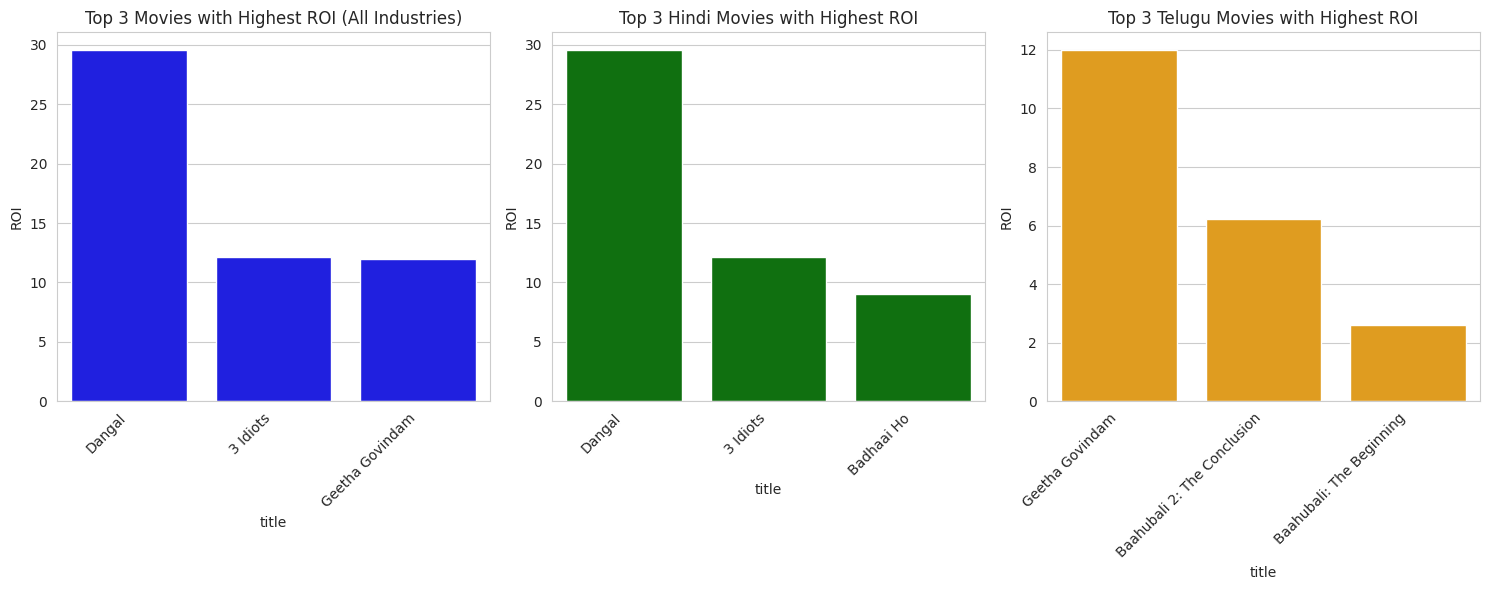

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='title', y='roi', data=top3_all, color='blue')
plt.title('Top 3 Movies with Highest ROI (All Industries)')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x='title', y='roi', data=top3_hindi, color='green')
plt.title('Top 3 Hindi Movies with Highest ROI')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x='title', y='roi', data=top3_telugu, color='orange')
plt.title('Top 3 Telugu Movies with Highest ROI')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 8.  Print Top ROI Movie Details

In [8]:
print("\nTop 3 Movies with Highest ROI (All Industries):")
print(top3_all[['title', 'budget_crores', 'boxoffice_crores', 'profit_crores', 'roi']])

print("\nTop 3 Hindi Movies with Highest ROI:")
print(top3_hindi[['title', 'budget_crores', 'boxoffice_crores', 'profit_crores', 'roi']])

print("\nTop 3 Telugu Movies with Highest ROI:")
print(top3_telugu[['title', 'budget_crores', 'boxoffice_crores', 'profit_crores', 'roi']])


Top 3 Movies with Highest ROI (All Industries):
              title  budget_crores  boxoffice_crores  profit_crores        roi
6            Dangal           70.0            2140.0         2070.0  29.571429
40         3 Idiots           35.0             460.0          425.0  12.142857
25  Geetha Govindam           10.0             130.0          120.0  12.000000

Top 3 Hindi Movies with Highest ROI:
         title  budget_crores  boxoffice_crores  profit_crores        roi
6       Dangal           70.0            2140.0         2070.0  29.571429
40    3 Idiots           35.0             460.0          425.0  12.142857
49  Badhaai Ho           22.0             221.0          199.0   9.045455

Top 3 Telugu Movies with Highest ROI:
                          title  budget_crores  boxoffice_crores  \
25              Geetha Govindam           10.0             130.0   
3   Baahubali 2: The Conclusion          250.0            1810.0   
39     Baahubali: The Beginning          180.0            